In [4]:
import sksurv
import os
import pandas as pd

In [5]:
os.chdir('C:\\Users\\v8307436\\Downloads\\ProjectDataset')

In [18]:
dt=pd.read_excel('selected genes LUSC.xlsx')


In [19]:
dt=dt.set_index(dt.columns[0])

In [20]:
c=pd.read_excel('cox LUSC.xlsx')

In [25]:
result=c.to_records(index=False)

In [22]:
c['Patient\'s Vital Status' ]=c['Patient\'s Vital Status' ].astype('bool')

In [23]:
print(c.columns)

Index(['Patient's Vital Status', 'Overall Survival'], dtype='object')


In [29]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
estimator = CoxPHSurvivalAnalysis(n_iter=1000)
estimator.fit(dt, result)


CoxPHSurvivalAnalysis(alpha=0, n_iter=1000, tol=1e-09, verbose=0)

In [30]:
pd.Series(estimator.coef_, index=dt.columns)

A4GALT                                                             -1.068300
AASDHPPT                                                           -0.566599
ABCA4                                                               1.054608
ABCC1                                                               3.559242
ACER3                                                              -0.311991
ACSM3                                                              -1.700672
ACTN1                                                               2.499476
ADCY5                                                              -1.287038
AFF2                                                                2.013827
ALKBH6                                                             -1.634272
ANO5                                                                2.785078
ANXA11                                                              1.546328
ANXA1                                                              -2.386701

In [34]:
from sksurv.metrics import concordance_index_censored

prediction = estimator.predict(dt)
result = concordance_index_censored(c['Patient\'s Vital Status'], c['Overall Survival'], prediction)
result[0]

0.9940746533521821

Text(0.5,0,'time $t$')

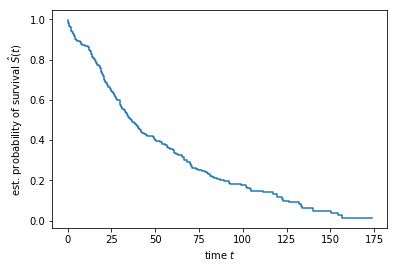

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(c['Patient\'s Vital Status'], c['Overall Survival'])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")